# Matplotlib使用详解V
## 直方图、分箱和密度

简单的直方图是理解数据集的第一步。

早些时候，我们看到了Matplotlib的直方图函数的预览，它在一个流水线上创建了一个基本的直方图。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

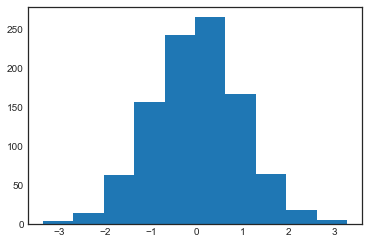

In [2]:
plt.hist(data);

“hist()”函数有许多选项来调整计算和显示;

这里有一个更定制的直方图的例子:

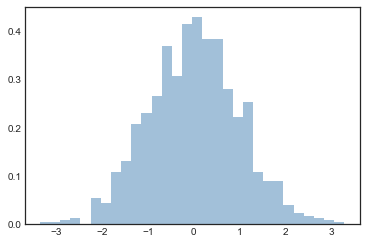

In [3]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

``plt.hist`` 介绍有更多关于其他定制选项的信息。

我发现``histtype='stepfilled'``'和一些透明度``alpha``组合使用在比较几个分布的直方图时非常有用:

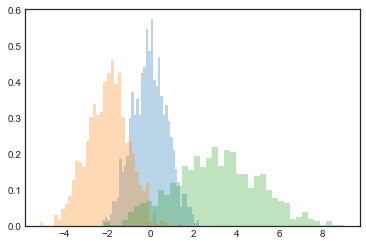

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

如果您想简单地计算直方图(即，计算给定bin中的点的数量)，而不显示它，那么``np.histogram()``函数可用:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 19 219 507 231  24]


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>
<b>对data进行绘制，将数据的分箱值设为100，透明度设为0.7，颜色修改为black，看看有什么不同？</b>
</div>

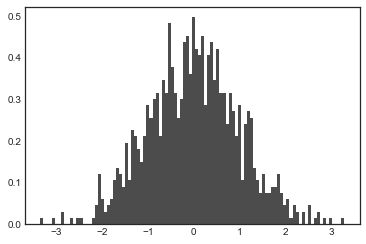

In [6]:
plt.hist(data, bins=100, normed=True, alpha=0.7,
         histtype='stepfilled', color='black',
         edgecolor='none');

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">
```
代码：
plt.hist(data, bins=100, normed=True, alpha=0.7,
         histtype='stepfilled', color='black',
         edgecolor='none');
    

```
</div>



## 二维的直方图和分箱

就像我们在一个维度中创建直方图一样，我们也可以在二维的容器中分割点来创建二维的直方图。

我们将在这里简要介绍几种方法。

我们首先定义一些数据——从多元高斯分布中得出的``x``和``y``数组:

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: 二维直方图

绘制二维直方图的一种简单方法是使用Matplotlib的``plt.hist2d`` 函数:

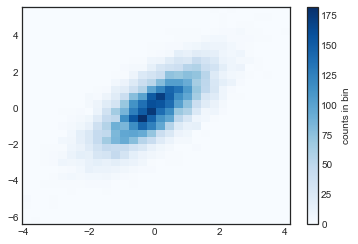

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

正如``plt.hist``, ``plt.hist2d``有一些额外的选项来微调这个图片和分箱，它在函数讲解中得到了很好的概括。

此外,正如``plt.hist``有一个对应的 ``np.histogram``, ``plt.hist2d``在``np.histogram2d``有一个对应的部分，我们可以像下面所示这样去使用：

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

为了推广这一直方图，在维度高于2的情况下，见 ``np.histogramdd`` 函数。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>
<b>对上面绘制的二维直方图进行修改，分箱值设为100，标签栏为“small test”，看看有什么不同？</b>
</div>

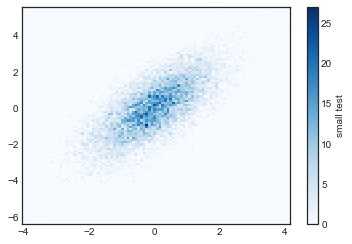

In [10]:
plt.hist2d(x, y, bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('small test')

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
plt.hist2d(x, y, bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('small test')
    


```
</div>



### ``plt.hexbin``: 六角分箱

二维直方图在坐标轴上创建一个正方形的镶嵌。

这种镶嵌的另一个自然形状是正六边形。

为此，Matplotlib提供了``plt.hexbin``例程，它显示了六边形区间内的观察计数。此图对于相对较大的数据集最有效。

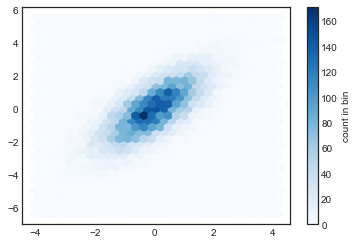

In [11]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin``有许多有趣的选项，包括为每个点指定权重的能力，以及将每个bin的输出更改为任何NumPy集合(权重的平均值、标准偏差的权重等)。

### 核密度估计

在多维度中评价密度的另一种常用方法是*核密度估计* (KDE)。

我们简单地说，KDE可以被认为是一种“抹掉”空间点的方法，并把结果加起来得到一个平滑的函数。

一个极快且简单的KDE实现存在于“scipy”中。统计数据的方案。

这里有一个使用KDE的快速例子:

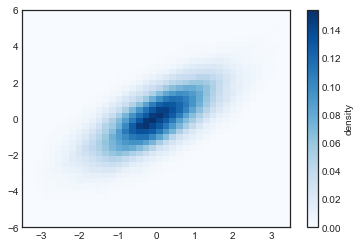

In [12]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE具有平滑的长度，可以有效地在细节和平滑之间滑动(一个常见的bias -方差交换的例子)。``gaussian_kde``使用了一个经验法则，试图为输入数据找到一个接近最优的平滑长度。其他KDE实现在SciPy生态系统中可用，每个都有自己的优缺点;

例如,``sklearn.neighbors.KernelDensity``和``statsmodels.nonparametric.kernel_density.KDEMultivariate``.对于基于KDE的可视化，使用Matplotlib往往过于冗长。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 3:</h1>
<b>对上面绘制的核密度估计图进行修改，x与y值的范围分别设为（-4,4）和（-10,10），元素个数都为80，并修改相应的核密度图的轴范围，将颜色修改为Greens，看看有什么不同？</b>
</div>

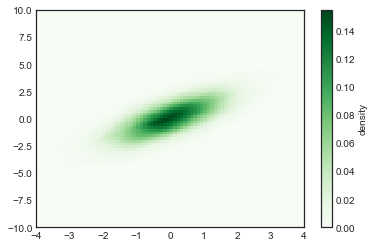

In [13]:
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-4, 4, 80)
ygrid = np.linspace(-10, 10, 80)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-4, 4, -10, 10],
           cmap='Greens')
cb = plt.colorbar()
cb.set_label("density")

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q3" class="collapse">
```
代码：
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

xgrid = np.linspace(-4, 4, 80)
ygrid = np.linspace(-10, 10, 80)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-4, 4, -10, 10],
           cmap='Greens')
cb = plt.colorbar()
cb.set_label("density")


```
</div>

